# PROBABILIDADES Y ESTADÍSTICA (C)

# Práctica 9

### Test de Hipótesis
---

![enunciado-3](./img/practica9/3.png)

In [1]:
data <- c(27, 41, 22, 27, 23, 35, 30, 24, 27, 28, 22)
data

[1] 27 41 22 27 23 35 30 24 27 28 22

In [6]:
n <- length(data)
n

[1] 11

In [3]:
mean(data)

[1] 27.81818

In [4]:
var(data)

[1] 33.76364

Hipótesis:

$$H_0: \sigma \geq 6$$

$$H_1 : \sigma < 6$$



Estadístico:

$$(n-1) \frac {S^2_n}{\sigma^2} \sim \chi^2_{n-1}$$

Región de Rechazo:

* $\alpha = 0.05$: Convención de valor acumulado **a derecha**

$$\mathcal R = \left\{ (n-1) \frac {S^2_n}{\sigma^2} \geq \chi^2_{n-1, \ 0.05} \right\} $$

$$\mathcal R = \left\{ S^2_n \geq \chi^2_{n-1, \ 0.05} \frac {\sigma^2}{(n-1)} \right\} $$

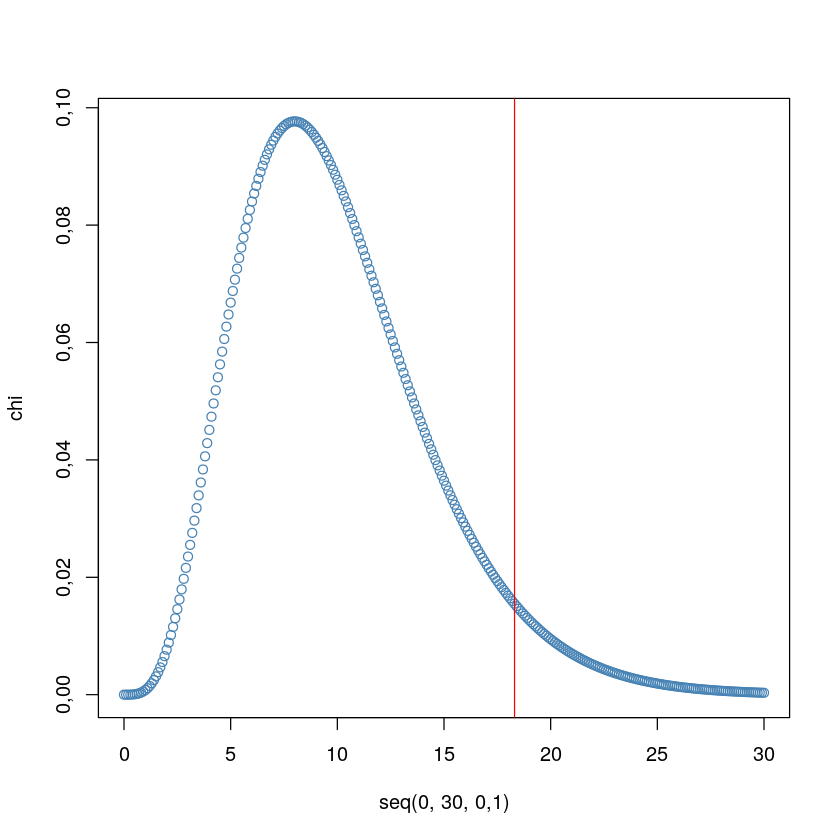

In [25]:
chi <- dchisq(df=10, seq(0,30,0.1))
plot(seq(0,30,0.1), chi, col='steelblue')
abline(v=qchisq(df=10, 0.95), col='red')

Función de potencia:

$$\mathcal P_{\sigma_1} \left( (n-1) \frac {S^2_n}{\sigma_0^2} \frac{\sigma_0^2}{\sigma_1^2} \geq \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.05} \right) = \alpha$$

$$\mathcal P_{\sigma_1} \left( (n-1) \frac {S^2_n}{\sigma_1^2} \geq \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.05} \right) = \alpha$$

$$1 - \mathcal P_{\sigma_1} \left( (n-1) \frac {S^2_n}{\sigma_1^2} < \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.05} \right) = \alpha$$

$$1 - \mathcal F_{X} \left( \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.05} \right) = \alpha$$

where:

* $X = (n-1) \frac {S^2_n}{\sigma_1^2} \sim \chi^2_{n-1, \ 0.05}$

Cumulative Chi Square $\mathcal F_X$

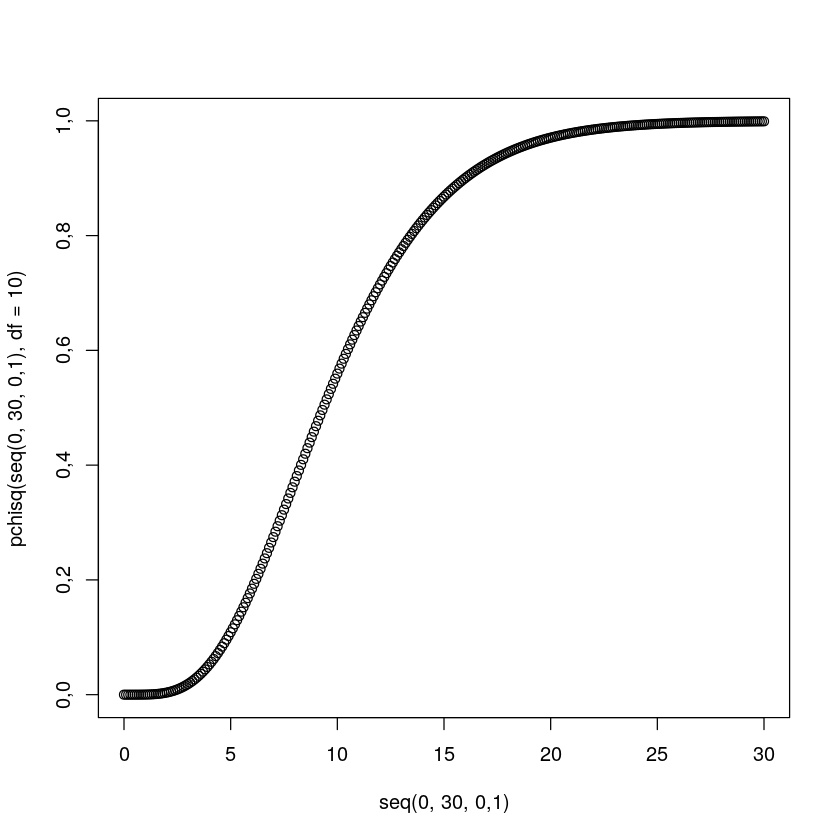

In [49]:
plot(seq(0, 30, 0.1), pchisq(seq(0, 30, 0.1), df=10))

$1-\mathcal F_X$ (1 - Cumulative Chi Square)

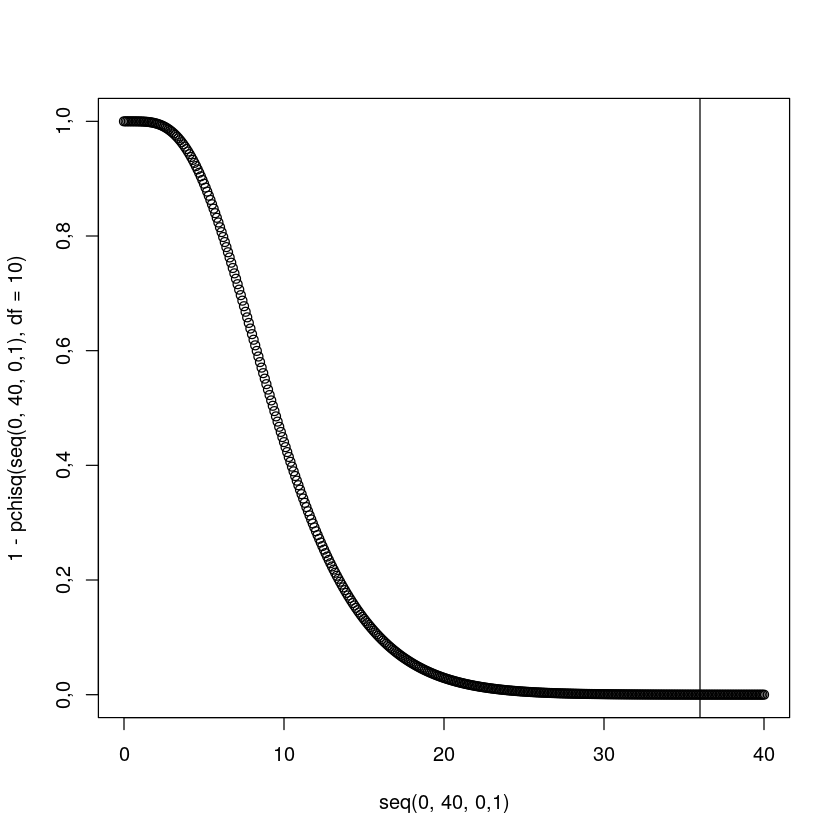

In [55]:
plot(seq(0, 40, 0.1), 1-pchisq(seq(0, 40, 0.1), df=10))


Quería:

$$1 - \mathcal F_{X} \left( \frac{\sigma_0^2}{\sigma_1^2} \chi^2_{n-1, \ 0.05} \right) = \alpha$$

where:

* $X = (n-1) \frac {S^2_n}{\sigma_1^2} \sim \chi^2_{n-1, \ 0.05}$

In [71]:
qchisq(1-0.05, df=10)

[1] 18,30704

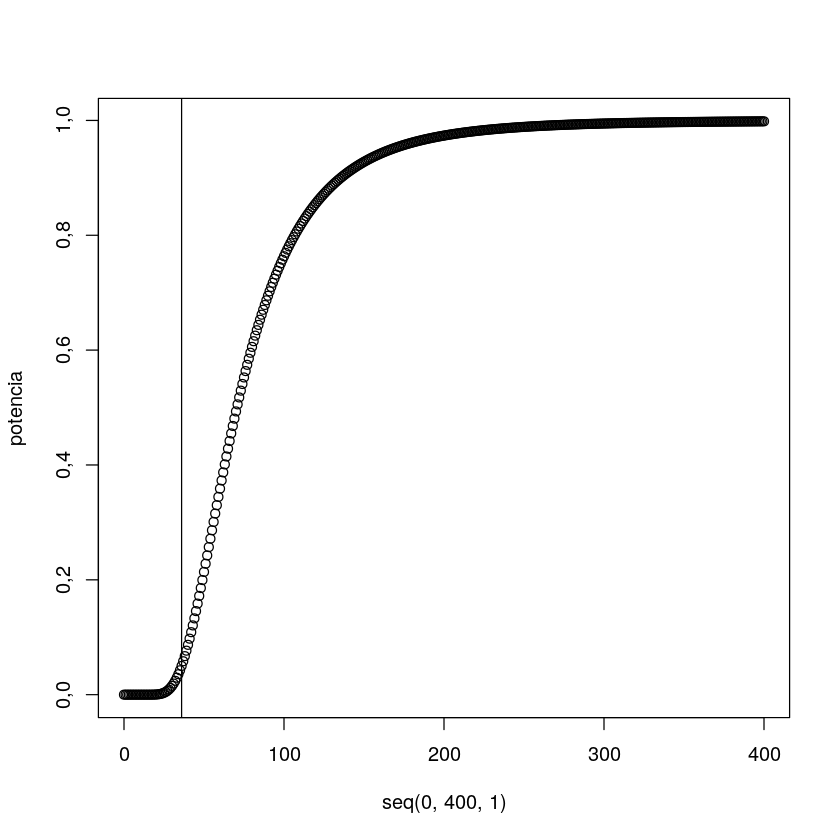

In [97]:
func_de_potencia <- function(s2_0, data, alfa=0.05){
    df <- length(data)-1
    chi_val <- qchisq(1-alfa, df=df)
    # s2_0 := Sigma_0^2
    ss2_1 <- seq(0, 400, 1) # Sigmas_1^2
    potencia <- 1 - pchisq(s2_0 / ss2_1 * chi_val, df=df)
    plot(seq(0, 400, 1), potencia, col='steelblue')
    abline(v=6**2, col='red')
    return(potencia)
}

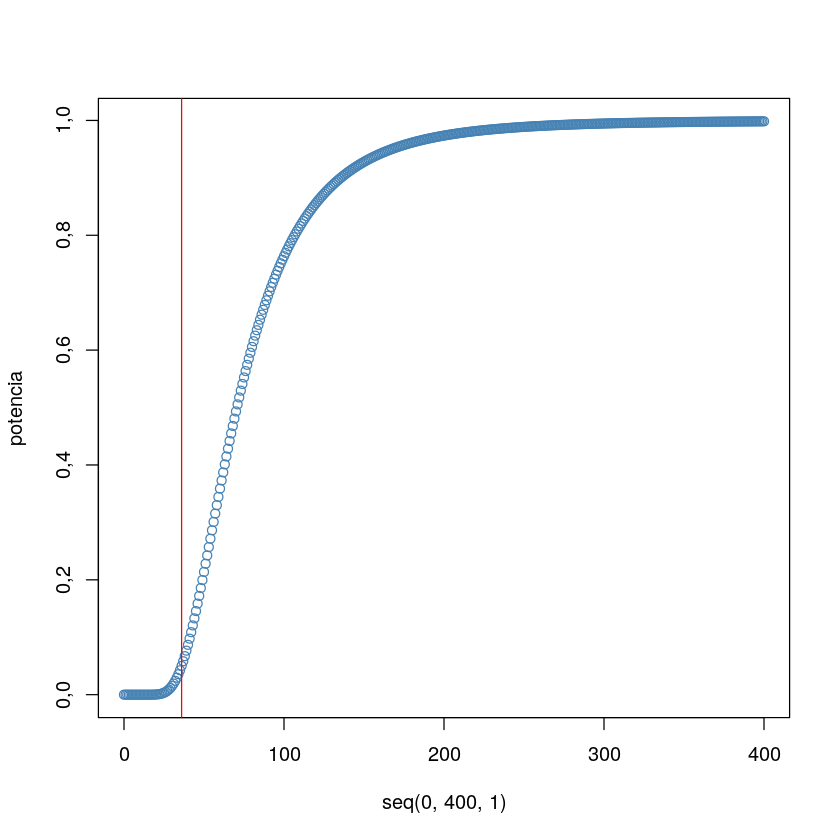

In [98]:
alphas <- func_de_potencia(6**2, data, alfa=0.05)

In [99]:
alfa <- 0.05
chi_val  <- qchisq(1-alfa, df=10)
sigma2_0 <- 6**2
sigma2_1 <- 6**2
potencia <- 1 - pchisq(sigma2_0 / sigma2_1 * chi_val, df=10)
potencia

[1] 0,05

Observamos que cuando $\sigma_1 = \sigma_0$, la potencia es de $\alpha = 0.05$, el nivel del test.